1) Осуществить чтение данных из двух csv файлов:
a. New_york_hotels.csv 
b. US_accidents_dec20.csv

In [294]:
%pylab inline
import pandas as pd
import ot
import ot.plot
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [17]:
NY = pd.read_csv('new_york_hotels.csv')
US = pd.read_csv('US_Accidents_Dec21_updated.csv')


In [237]:
NY = NY.loc[(NY['city'] == "New York")]

,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
787,219370,Dumont NYC-an Affinia hotel,150 E. 34th Street at Lexington Avenue,New York,NY,10016,40.74624,-73.97929,4.0,349.7400,299.2400
788,109277,Park Central New York,870 7th Ave,New York,NY,10019,40.76452,-73.98078,4.0,191.0000,190.0000
789,116103,Blakely New York,136 W 55th St,New York,NY,10019,40.76366,-73.97965,4.5,206.4600,205.4600
790,415836,Pod 39,145 East 39th Street,New York,NY,10016,40.74929,-73.97670,3.0,220.0373,130.0206
791,351449,Sheraton Tribeca New York Hotel,370 Canal Street,New York,NY,10013,40.72102,-74.00418,4.0,350.1800,219.1800
...,...,...,...,...,...,...,...,...,...,...,...
1183,658840,Astor on the Park,465 Central Park West,New York,NY,10025,40.79974,-73.95889,3.0,209.3300,149.3300
1184,659207,Hotel Hayden,127 West 28th Street,New York,NY,10001,40.74660,-73.99179,4.0,250.4800,249.4800
1185,663607,Embassy Suites by Hilton New York Midtown Manh...,60 West 37th Street,New York,NY,10018,40.75142,-73.98575,3.5,649.4200,521.4200
1186,675077,Saint Nicholas Inn,154th Street,New York,NY,10032,40.83071,-73.94302,2.5,150.7901,112.8715


In [51]:
US.tail(10)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2845332,A-2845333,2,2019-08-23 17:42:27,2019-08-23 18:11:10,34.064460,-118.003880,34.065330,-117.997150,0.390,At I-605 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845333,A-2845334,2,2019-08-23 17:40:12,2019-08-23 18:08:35,33.943599,-117.077880,33.943599,-117.077880,0.000,At Jack Rabbit Trl - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845334,A-2845335,2,2019-08-23 17:40:12,2019-08-23 18:08:35,34.261030,-119.228000,34.262390,-119.230870,0.189,At Telephone Rd/Exit 65 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845335,A-2845336,2,2019-08-23 17:43:56,2019-08-23 18:12:27,33.741700,-117.837090,33.739170,-117.830010,0.443,At CA-55 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845336,A-2845337,2,2019-08-23 18:30:23,2019-08-23 18:58:54,34.239104,-118.416176,34.239104,-118.416176,0.000,At Osborne St/Exit 154 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845341,A-2845342,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.133930,-117.230920,34.137360,-117.239340,0.537,At Highland Ave/Arden Ave - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [286]:
US2 = pd.DataFrame(US[["Start_Lat","Start_Lng","City"]])
US2 = US2.loc[(US2['City'] == "New York")]
US2 = pd.DataFrame(US2[["Start_Lat","Start_Lng"]])
US2.shape
US2.sample(frac=1)
US2 = US2[:401]
US2.shape

US3 = np.array(US2)
print(US2.min())
print(US2.max())



Start_Lat    40.70142
Start_Lng   -74.01524
dtype: float64
Start_Lat    40.876510
Start_Lng   -73.923891
dtype: float64


In [376]:
NY2 = pd.DataFrame(NY[['latitude','longitude']])
NY3 = np.array(NY2)
print(NY2.min())
print(NY2.max())

NY2.shape

latitude     40.70320
longitude   -74.01722
dtype: float64
latitude     40.84841
longitude   -73.93139
dtype: float64


(401, 2)

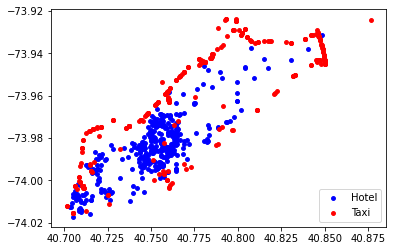

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

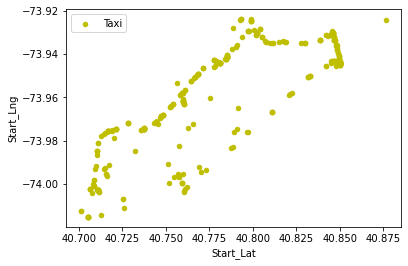

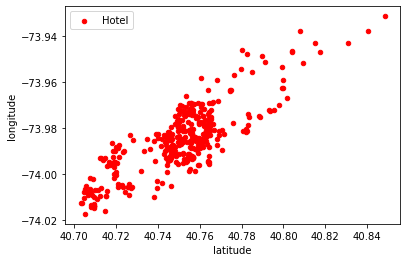

In [288]:
X = NY2['latitude']
Y = NY2['longitude']

x = US2['Start_Lat']
y = US2['Start_Lng']


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X, Y, s = 15, c = 'b', label = 'Hotel')
ax1.scatter(x, y, s = 15, c = 'r', label = 'Taxi')



plt.legend(loc='lower right');
plt.show()


US2.plot(x='Start_Lat', y='Start_Lng', kind='scatter', c='y', label='Taxi')
NY2.plot(x='latitude', y='longitude', kind='scatter', c='r', label='Hotel')

(401, 401)


Text(0.5, 1.0, 'OT matrix with samples')

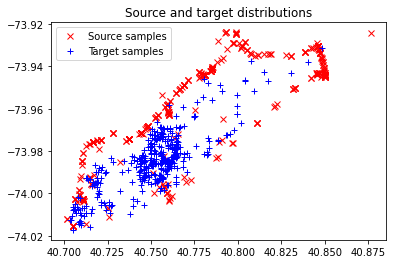

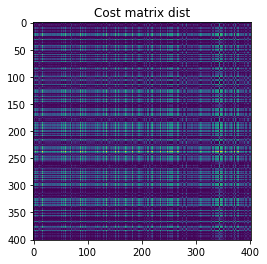

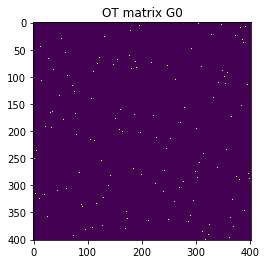

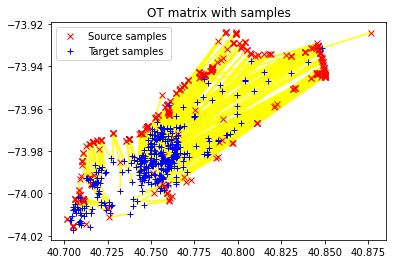

In [306]:
dist = ot.dist(US3,NY3)
dist /= dist.max()

print(dist.shape)

plt.figure(1)
plt.plot(US3[:, 0], US3[:, 1], 'xr', label='Source samples')
plt.plot(NY3[:, 0], NY3[:, 1], '+b', label='Target samples')
plt.legend(loc=0)
plt.title('Source and target distributions')

plt.figure(2)
plt.imshow(dist, interpolation='nearest')
plt.title('Cost matrix dist')

n = 401
a,b = np.ones((n,)) / n, np.ones((n,)) / n
G0 = ot.emd(a,b,dist)

plt.figure(3)
plt.imshow(G0, interpolation = 'nearest')
plt.title('OT matrix G0')

plt.figure(4)
ot.plot.plot2D_samples_mat(US3,NY3,G0, c="yellow")
plt.plot(US3[:, 0], US3[:, 1], 'xr', label='Source samples')
plt.plot(NY3[:, 0], NY3[:, 1], '+b', label='Target samples')
plt.legend(loc=0)
plt.title('OT matrix with samples')

In [326]:
table=[]
table2=[]
i=0
j=0
while j < n:
    while i < n:
        if G0[i,j]>0:
            table.append([i,j])
        i = i + 1
    table2.append(table)
    i = 0
    j = j + 1

import csv

with open('ID.csv',"w",newline="") as f:
    writer = csv.writer(f)
    writer.writerows(table)


In [369]:

Taxi = pd.DataFrame(US3, columns=['Taxi latitude','Taxi longitude'])
Hotel = pd.DataFrame(NY3, columns=['Hotel latitude','Hotel longitude'])


In [370]:
dots = pd.read_csv('ID.csv')

In [371]:
dots

,US3,NY3
0,12,0.0
1,59,1.0
2,251,2.0
3,350,3.0
4,315,4.0
...,...,...
396,278,396.0
397,57,397.0
398,287,398.0
399,146,399.0


In [372]:
HotelwithID = pd.DataFrame(dots["US3"])
HotelwithID2 = pd.DataFrame(dots["NY3"])

In [373]:
TaxiID = HotelwithID.join(Taxi, rsuffix='_right') 
TaxiID

,US3,Taxi latitude,Taxi longitude
0,12,40.850020,-73.943990
1,59,40.771460,-73.946580
2,251,40.762979,-73.973938
3,350,40.744340,-73.971240
4,315,40.710680,-74.002720
...,...,...,...
396,278,40.758280,-73.958970
397,57,40.838519,-73.933382
398,287,40.737570,-73.974220
399,146,40.744340,-73.971240


In [374]:
TaxiID = HotelwithID2.join(Hotel, rsuffix='_right') 
TaxiID

,NY3,Hotel latitude,Hotel longitude
0,0.0,40.74624,-73.97929
1,1.0,40.76452,-73.98078
2,2.0,40.76366,-73.97965
3,3.0,40.74929,-73.97670
4,4.0,40.72102,-74.00418
...,...,...,...
396,396.0,40.79974,-73.95889
397,397.0,40.74660,-73.99179
398,398.0,40.75142,-73.98575
399,399.0,40.83071,-73.94302
